<div class="alert alert-block alert-danger" style="color:black"><h2>THIS WORKBOOK IS ASSESSED</h2>
    Each activity details how many marks it is worth (out of 100), and how marks are awarded.<br>
    As before, you will be submitting a file of python code for marking and the notebooks use a two-stage process to help you.<br>
    As you work through the activities in the workbook:
    <ol>
        <li>  <em>Jupyter <code>%%writefile</code> cell magics</em>  save your code to a file"studentcode/student_wb3" as you run cells after editing</li>
        <li> Subsequent cells reload your code from that file to test the latest version .</li>
    </ol>
    When you are satisfied that you have completed the activities as required you should:
    <ol>
        <li> Restart the kernel and do a single run through of every cell in turn  so <code>studentcode/student_wb3.py</code> has no duplicated definitions.</li>
        <li> Run the notebook <b>selfchecker.ipynb</b> to check for syntax errors when called from our marking code, and edit as needed</li>
        <li>Download <code>studentcode/student_wb3.py</code> to your local machine.</li>
        <li>Follow the links in the <i>Assessments</i> folder on Blackboard to submit it for automatic marking and feedback.<br>
        This may involve answering some multiple choices questions as well as submitting your code.</li>
        <li><b>Read the feedback provided</b> and use it to improve your work.<br>
            <b>You will have four attempts to submit each notebook.</b></li>
    </ol>
<h3> Important instructions about formatting your code cells</h3>
<ol>
   <li>Where you are asked to insert code, or to complete a code skeleton, <b>you must only put code where indicated</b>.<br>
    Otherwise the marking server - or the plagiarism detection we will run later - will not be able to parse and accept them.<br>
    So your code should only go:
       <ul> 
           <li><b>After</b> the lines marked <code># ====> insert your code below here </code></li>
           <li> <b>Before</b> the lines marked <code># <==== insert your code above here</code></li>
      </ul>
   </li>
    <li>The marking server will reject any files containing imports except "approvedimports".<br>
               The marking server has its own copy of that file, so there is no point editing the one we give you.</li>
    <li>Even in comments you must not use any of these banned words: <em>system, read,import</li>
</ol>

</div>

# Workbook 3: Informed Search Algorithms

Overview of activities and objectives of this workbook:

1. The first part of this workbook will apply the Depth-first and Breadth-first algorithms you created last week to a new problem - navigating a maze (**If you have not done worksheet 2, go back and do that first**).
    - A maze is a simple and easy-to-visualise optimisation problem to illustrate the properties of different search algorithms.
    - A maze has a starting position and the desired endpoint (goal), so we need to find a sequence of inputs that takes us from the start to the goal in as few moves as possible.
    - A maze can be modelled like a graph, just like fox-chicken-grain and the combination lock.

2. The second part of this workbook will implement the Best-first and A-Star search algorithms.
    - We will do this in a similar way as Depth-first and Breadth-first, by overriding the `select_and_move_from_openlist()` function of the `SingleMemberSearch` class.
    - Depth-first and Breadth-first are both **uninformed** search algorithms, which means they do not consider the *quality* of a candidate solution.
    - Best-first and A-Star are both **informed** search algorithms, which means they do consider the *quality* of a candidate solution.
    - In the case of a maze, the quality could simply be the distance the candidate solution is to the goal (Best-first), or the number of moves so far + the distance the candidate solution is to the goal (A-Star).

3. The third part of this workbook will test your understanding of these algorithms and compare their behaviour.
    - And give you experience of evaluating the efficiency of an algorithm for a problem (in this case path-planning) by creating different instances of a problem (mazes) to *stress-test* different methods.

<div style="background-color:black;width:100%;"></div>

# Part 1: Solving a maze with breadth-first and depth-first search

As discussed in the lectures, we consider a general generate-and-test framework for search that can be easily adapted to provide algorithms with different behaviours and applied to many different problems.

This is illustrated in the flowchart below.

<img src = "figures/generate-and-test-framework.png">

In this week's lecture presentation (available in the notebook **W3_Informed_Search_Algorithms.ipynb**)
we discussed how to create different algorithms, with different behaviours, just by adapting the function **select_and_move_from_openlist()**.

In last week's lab session you should have:
1. Got familiar with a general implementation framework we provided with classes for:
  - **SingleMemberSearch**
  - **Problem**
  - **CandidateSolution**
2. Created your own search subclasses **DepthfirstSearch** and **BreadthFirstSearch** by over-riding the function **select_and_move_from_openlist()**
3. Applied those algorithms to two subclasses of problem: **CombinationLock** and **FoxChickenGrain**

This Week you can apply those algorithms to the problem of solving a maze.
Run the following cells:
1. The first ones import the maze and other libraries we need
2. The second defines two functions for running a search algorithm on a maze and also testing different search algorithms. The function `test_on_maze()` compares the behaviour of your implementation with mine - they should match.

<div class="alert alert-block alert-danger" style="color:black"><h2>If you are photosensitive or find the screen flickering disturbing</h2>
    <b>Apologies!</b>There is a trade-off between how long to pause after each move which affects the time taken to do a run, and how likely the screen is to flicker. It can be hard to judge that with a distributed server. To change this:
    <ul>
        <li>open the file <i>maze.py</i> in the jupyter editor</li>
        <li>increase the default value of <code>refresh_rate</code> on line 107li>
        <li>rerun the first cell below to reload the Maze class</li>
      </ul>
</div>

In [1]:
# YOU MUST RUN THIS CELL BUT DO NOT EDIT IT OR YOU WILL BREAK THE NOTEBOOK
from importlib import reload
import sys, os

# Import from the common directory
sys.path.append('../common')
sys.path.append('studentcode')

from singlemembersearch import SingleMemberSearch
from candidatesolution import CandidateSolution

# doing it this way lets you edit maze.py then re-run this cell, without needing to restarting the kernel
import maze
reload(maze)
from maze import Maze

In [2]:
# Optional
# Running this cell gives you a list of class methods and what they do
help(Maze)

Help on class Maze in module maze:

class Maze(problem.Problem)
 |  Maze(mazefile: str)
 |
 |  Class definition for a rectangular maze problem.
 |
 |  Method resolution order:
 |      Maze
 |      problem.Problem
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, mazefile: str)
 |      Constructor.
 |
 |      Parameter
 |      ---------
 |      mazefile(str)
 |         name of the file holding the maze definition
 |
 |  cellid_to_coords(self, cellid: int) -> tuple[int, int]
 |      Converts an index back to coordinates.
 |
 |      Parameters
 |      ----------
 |      cellid(int)
 |          index
 |
 |      Returns
 |      -------
 |      tuple(x coordinate,y coordianate)
 |
 |  colour_cell_from_id(self, cellid: int, colour: float)
 |      Assigns colour to cell in rectangular representation of maze.
 |
 |      Parameters
 |      ----------
 |      cellid(int)
 |           index in list representation
 |      colour (float)
 |
 |  coords_to_cellid(self, x, y) -

In [3]:
# You MUST run this cell
# run_on_maze() defines the method that tries an algorithm on a maze
def run_on_maze(
    algorithm: SingleMemberSearch, 
    show_runlog: bool = False, 
    mazefile: str = "maze.txt"
     ) -> tuple[int, int]:
    """ function that tries to run a search algorithm on a maze problem
    Parameters
    ----------
    algorithm: name of a class of search algorithm
    show_runlog (bool) whether to print debugging information
    mazefile (str): name of the file containing  definition of a specific maze instance
    """
    
    mymaze = Maze(mazefile=mazefile)
    mysearch = algorithm(mymaze, constructive=True, max_attempts=1500)
    name = mysearch.__str__()
    trials = -1
    moves = -1
    found = mysearch.run_search()
    if found:
        trials = mysearch.trials
        moves = len(mysearch.result)
        print(
            f"search using {name} algorithm successful after {trials} attempts"
            f" length of path is {moves} moves."
        )
    else:
        print("solution not found in time allowed")
        if show_runlog:
            print(mysearch.runlog)

    del mymaze
    return trials, moves, name

jims_results: dict = {
    "depth-first": [408, 77],
    "breadth-first": [1068, 57],
    "local search": [-1, -1],
    "best-first": [856, 57],
    "A Star": [812, 57],
}

# test_on_maze() is a function that tests an algorithms on a maze
def test_on_maze(algorithm: SingleMemberSearch, mazefile="maze.txt"):
    trials, moves, name = run_on_maze(algorithm, mazefile)
    correct_trials, correct_moves = jims_results[name]

    print(f"testing algorithm {name} on the simple maze.")
    if trials == -1 or moves == -1:
        errstr1 = "Error, the test suggests your code is not reaching the goal"
        errstr2 = "Error, the test suggests your code is not reaching the goal"

    else:
        errstr1 = (
            f"Error: your code is using {trials} trials "
            f" but should only need {correct_trials}.\n"
        )
        errstr2 = (
            f"Error: your code finds a solution with {moves} "
            f" but should only need {correct_moves}.\n"
        )
    assert trials == correct_trials, errstr1
    assert moves == correct_moves, errstr2
    print("test passed")

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 1: Testing your Depth-first and Breadth-First Search code on the maze</h2>
    <h3><b>30 marks</b> - 15 for each algorithm if it passes the test below on the marking server</h3>
    <b>How to get started:</b>
    <ol>
        <li> Copy-paste your class code for <code>DepthFirstSearch</code> from workbook2 into the empty cell below. Then run that cell and the one after so you can see if your code solves the maze.</li>
        <li> Copy-paste your class code for <code>BreadthFirstSearch</code> from workbook2 into the empty cell below. Then run that cell and the one after so you can see if your code solves the maze.</li>
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
    If your code passed the tests for the <code>CombinationLock</code> problem last week it should work fine. If not:
    <ul>
        <li>Make sure the <code>__str__()</code> method must return the same string as I use in <code>test_on_maze()</code> above, e.g. 'depth-first' and 'breadth-first'</li>
        <li>Rerun those cells to tell python to use the edited versions</li>
        <li>Then rerun the test cells as necessary</li>
        <li>You can turn on printing of the runlog in the test cells if it helps you debug your code</li>
    </ul>
</div>

### Copy-paste your class definition for Depth-first search into the code cell below then run it
- it must have no comments or code outside the class definition or the marking server will not accept it.

In [4]:
%%writefile "studentcode/student_wb3.py"

from approvedimports import *

class DepthFirstSearch(SingleMemberSearch):
    """your implementation of depth first search to extend
    the superclass SingleMemberSearch search.
    Adds  a __str__method
    Over-rides the method select_and_move_from_openlist
    to implement the algorithm
    """

    def __str__(self):
        return "depth-first"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """void in superclass
        In sub-classes should implement different algorithms
        depending on what item it picks from self.open_list
        and what it then does to the openlist

        Returns
        -------
        next working candidate (solution) taken from openlist
        """

        # create a candidate solution variable to hold the next solution
        next_soln = CandidateSolution()

        # ====> insert your pseudo-code and code below here
        next_soln=self.open_list.pop()
        # <==== insert your pseudo-code and code above here
        return next_soln

Overwriting studentcode/student_wb3.py


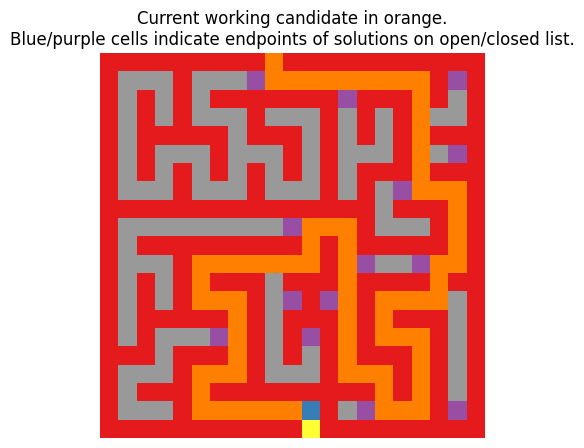

search using depth-first algorithm successful after 408 attempts length of path is 77 moves.
testing algorithm depth-first on the simple maze.
test passed


In [5]:
# Run this cell to test your depth-first implementation
from approvedimports import *

import student_wb3 
reload(student_wb3)

print("Testing Depth-First Search")
test_on_maze(student_wb3.DepthFirstSearch)

### Copy-paste your class definition for Breadth-first search into the code cell below then run it
- it must have no comments or code outside the class definition or the marking server will not accept it.

In [6]:
%%writefile -a "studentcode/student_wb3.py"

class BreadthFirstSearch(SingleMemberSearch):
    """your implementation of depth first search to extend
    the superclass SingleMemberSearch search.
    Adds  a __str__method
    Over-rides the method select_and_move_from_openlist
    to implement the algorithm
    """

    def __str__(self):
        return "breadth-first"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Implements the breadth-first search algorithm

        Returns
        -------
        next working candidate (solution) taken from openlist
        """
        # create a candidate solution variable to hold the next solution
        next_soln = CandidateSolution()

        # ====> insert your pseudo-code and code below here
        next_soln = self.open_list.pop(0)
        # <==== insert your pseudo-code and code above here
        return next_soln

Appending to studentcode/student_wb3.py


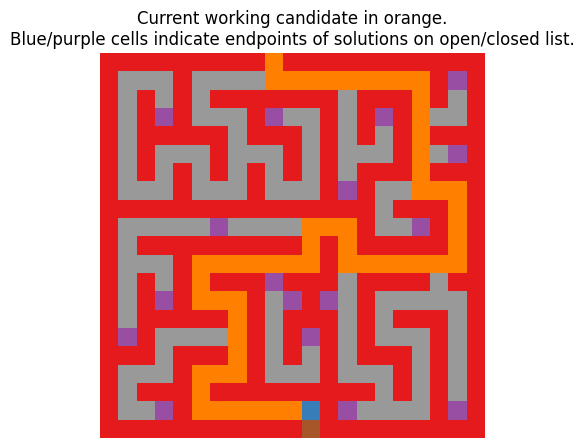

search using breadth-first algorithm successful after 1068 attempts length of path is 57 moves.
testing algorithm breadth-first on the simple maze.
test passed


In [7]:
# Run this cell to test your breath-first implementation
reload(student_wb3)

print("Testing Breadth-First Search")
test_on_maze(student_wb3.BreadthFirstSearch)

<div style="background-color:black;width:100%;"></div>

# Part 2: Best-first and A-Star search

Remember that both Best-first and A-Star are **informed** search algorithms, which means they also consider the 'quality' or 'cost' (or 'score') of a candidate solution when selecting which one to move from the openlist.

Depending on the problem we might want to:
- *maximise the quality* e.g. find the candidate solution with the highest quality on the openlist.
- *minimise the cost* e.g. find the candidate solution with the lowest cost on the openlist.

In the context of solving a maze:
- **Best-first** finds the candidate solution that is closest to the goal e.g. it tries to *minimise* the distance to the goal.
- **A-star** finds the candidate solution that is closest to the goal + has taken the fewest steps so far e.g. it tries to *minimise* the distance to the goal *and* the distance travelled so far. So a solution that took a shorter rout to reach the same place will be favoured.

<div class="alert alert-block alert-warning" style="color:black">
<b>Refresher: finding things in a list with python according to some criteria</b><br>
    A python list (let's call it <code>my_list</code>) holds a collection of objects, usually of the same type:
    <ul>
        <li> If you have a list <code>my_list</code> with <em>n</em> elements, then <i>len(myList) = n</i></li>
        <li> This is true whether the elements are chars, ints, float, or objects of some class</li>
    </ul>
    If <code>my_list</code> holds elements (objects) of a type that has an attribute <i>cost</i>, and we want to find the index (position) of the element one with the lowest value, we do it with a loop.<br>
    Start in position 0, then loop through every thing in the list one by one, looking at the value of <i>cost</i> in each element, remembering the position (index) of the one with the lowest <i>cost</i>.</p>
    In code this looks like:
    <pre lang="python" style="background:#ECFFDC">    
   best_index = 0
   <span style="color:green">for</span> i <span style="color:green">in range</span>(<span style="color:green">len</span>(my_list)):
       <span style="color:green">if</span> my_list[i].cost < my_list[best_index].cost : 
           best_index = i
   </pre>
    So at the end of this process the variable <code>best_index</code> tells us the index of the "best" element in that list according to our choice criteria (minimising cost). If we want to use something else as our criteria, we just change the if statement.<br><br>
    Sometimes you might choose to store the value <code> best_so_far = my_list[best_index].cost</code> and use that in the comparison (line 3 above) to make your code more readable (shorter lines).<br>
    You just need to update <code>best_so_far</code> as well as <code>best_index</code> inside the <code>if</code> statement.<br><br>
    So this different version of the code does the same thing but you may find it easier to understand.
    <pre lang="python" style="background:#ECFFDC">
    best_index = 0
    best_so_far = my_list[0].cost
    <span style="color:green">for</span> index <span style="color:green">in range</span>(len(my_list) ):
        this_cost= my_list[index].cost
        <span style="color:green">if</span> this_cost < best_so_far: 
            best_index = index
            best_so_far = this_cost
    </pre>
</div>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 2: Implementing Best-First and A Star Search</h2>
    <h3><b>40 marks</b> - 20 each for an implementation that passes the test below on the marking server</h3>
    For both algorithms the cells below provide the pseudo-code, a partially completed implementation, and a test.<br> This activity requires you to complete the code to produce classes which implement the algorithms, using the pseudocode as your guide.<br>
    <b>Completing this activity is very similar to those in workbook 2 for breadth and depth-first search.</b> You are just completing one function.
    <br><br><b>How to get started:</b>
    <ol>
        <li>Complete the function <code>select_and_move_from_openlist()</code>.
        <li>Start by copying the pseudo-code into the method as comments</li>
        <li>Then insert one or two lines of code to implement each comment
        <li> Your code should start by checking whether the openlist is empty
            <ul>
            <li> return <code>None</code> if openlist is empty</li>
            <li> Otherwise select and return the appropriate item from the openlist </li>
            </ul>
        </li>
    </ol>
 </div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b> 
    <ul>
        <li> Use the reminder above for how to select from a list by value</li>
        <li> Remember that each instance of the class has an attribute <code>self.open_list</code> which contains instances of <code>CandidateSolution</code></li>
        <li>All <code>CandidateSolution</code> have a <code>quality</code> and <code>variable_values</code></li>
            <ul>
                <li>The number of moves a candidate solution has made is the length of <code>variable_values</code></li>
                <li>The distance to the goal is the <code>quality</code> (and this is calculated for you).
            </ul>
    </ul>
</div>

### Pseudocode for Best-First Search

<div style="background:#F0FFFF;color:black">
<p style="color:darkredmargin-bottom:0pt"><em>SelectAndMoveFromOpenList</em></p>
<dl style="margin-top:0pt">
    <dt>&nbsp;&nbsp;&nbsp;<b>IF</b> IsEmpty( open_list) <b>THEN</b> </dt>
    <dd> RETURN None</dd>
    <dt> &nbsp;&nbsp;&nbsp;<b>ELSE</b></dt>
    <dd>bestChild &larr; <b>GetMemberWithHighestQuality</b>(openList)</dd>
    <dd> RETURN bestChild&nbsp;&nbsp;&nbsp;&nbsp;<span style="background:pink">Best-First keeps the openlist to allow backtracking</span></dd>
</dl>
</div>   

In [8]:
%%writefile -a "studentcode/student_wb3.py"

class BestFirstSearch(SingleMemberSearch):
    """Implementation of Best-First search."""

    def __str__(self):
        return "best-first"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Implements Best First by finding, popping and returning member from openlist
        with best quality.

        Returns
        -------
        next working candidate (solution) taken from openlist
        """

        # create a candidate solution variable to hold the next solution
        next_soln = CandidateSolution()

        # ====> insert your pseudo-code and code below here
        if len(self.open_list) == 0:
            return None 
        else:
            best_index = 0 
            for i in range (1,len(self.open_list)):
                if self.open_list[i].quality<self.open_list[best_index].quality:
                    best_index= i 
                    
            next_soln=self.open_list.pop(best_index)
            
            
        # <==== insert your pseudo-code and code above here
        return next_soln

Appending to studentcode/student_wb3.py


In [9]:
# Run this to test your Best-First implementation
reload(student_wb3)

print("Testing Best-First Search")
test_on_maze(student_wb3.BestFirstSearch)

KeyboardInterrupt: 

### Pseudocode for A-Star Search

<div style="background:#F0FFFF;color:black">
<p style="color:darkred;margin-bottom:0pt"><em>SelectAndMoveFromOpenList</em></p>
<dl style="margin-top:0pt">
    <dt>&nbsp;&nbsp;&nbsp;<b>IF</b> IsEmpty( open_list) <b>THEN</b> </dt>
    <dd> RETURN None</dd>
    <dt> &nbsp;&nbsp;&nbsp;<b>ELSE</b></dt>
    <dd><span style="background:pink">AStar picks using sum of quality +cost</span></dd>
    <dd>bestChild &larr; <b>GetMemberWithHighestCombinedScore</b>(openList)</dd>
    <dd> RETURN bestChild&nbsp;&nbsp;&nbsp;&nbsp;</dd>
</dl>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b><br>
    This is just like best-first with a modified selection. To make more efficient you can track <i>bestSoFar</i> and modify <code>UpdateWorkingMemory()</code> so it doesn't put things on the openlist if depth > bestSoFar.
</div>

In [ ]:
%%writefile -a "studentcode/student_wb3.py"

class AStarSearch(SingleMemberSearch):
    """Implementation of A-Star  search."""

    def __str__(self):
        return "A Star"

    def select_and_move_from_openlist(self) -> CandidateSolution:
        """Implements A-Star by finding, popping and returning member from openlist
        with lowest combined length+quality.

        Returns
        -------
        next working candidate (solution) taken from openlist
        """
        
        # create a candidate solution variable to hold the next solution
        next_soln = CandidateSolution()

        # ====> insert your pseudo-code and code below here
        if self.open_list == []:
            return None
        else:
            best_index=0
            best_so_far= sum(self.open_list[0].variable_values) + self.open_list[0].quality
            for i in range (1, len(self.open_list)):
                this_cost = sum(self.open_list[i].variable_values) + self.open_list[i].quality
                if this_cost < best_so_far:
                    best_so_far=this_cost
                    best_index=i
            


            next_soln=self.open_list.pop(best_index) 
        # <==== insert your pseudo-code and code above here
        return next_soln

Appending to studentcode/student_wb3.py


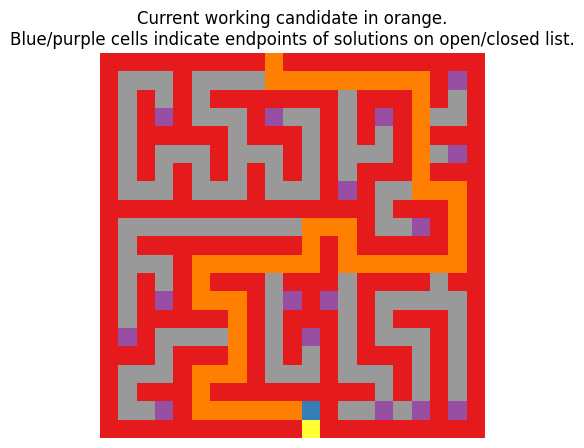

search using A Star algorithm successful after 780 attempts length of path is 57 moves.
testing algorithm A Star on the simple maze.


AssertionError: Error: your code is using 780 trials  but should only need 812.


In [ ]:
# Run this to test your A-star implementation
reload(student_wb3)

print('Testing A-star Search')
test_on_maze(student_wb3.AStarSearch)

<div style="background-color:black;width:100%;"></div>

# Part 3: Testing your understanding

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 3: Testing your understanding</h2>
    <h3><b>20 marks</b></h3>
    Run the cell below and answer the questions then press the <b>check</b> button to check your answers. When you submit your jupyter notebook for automated marking via blackboard, there will be similar questions for you to answer online.
</div>

In [ ]:
import workbook3_utils as wb3

reload(wb3)
display(wb3.Q1)
display(wb3.Q2)
display(wb3.Q3)
display(wb3.Q4)
display(wb3.Q5)
display(wb3.Q6)
display(wb3.Q7)
display(wb3.Q8)

### Editing the maze to add or remove walls

The next two cells below illustrate how to create a new instances of the path-finding problem by changing walls into paths or vice-versa. They show a 'before and after' display of how to make a hole in a wall and place a new wall, by setting a value in `.contents` array (first index is row, second column).

The third cell shows how to save an edited maze to file and then checks it loads properly into a new maze object.

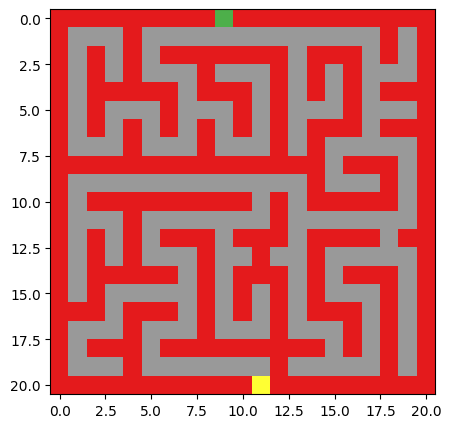

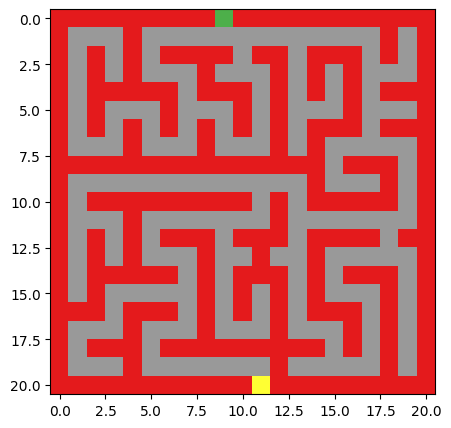

In [10]:
# Set the wall colour and the hole colour
wall_colour= 0.0
hole_colour = 1.0

# Load original maze
hole_in_wall = Maze(mazefile="maze.txt")

# make a hole in a wall, one place to the right of the entrance, three blocks down
hole_in_wall.contents[2][10] = hole_colour
_ = hole_in_wall.show_maze()

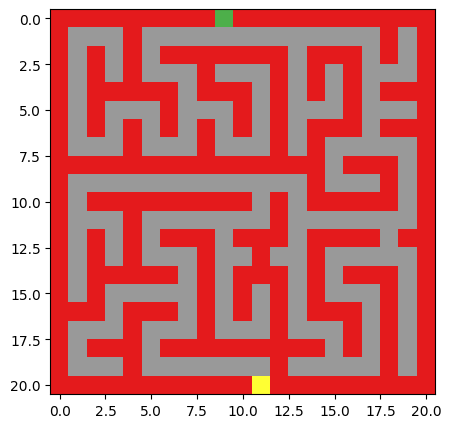

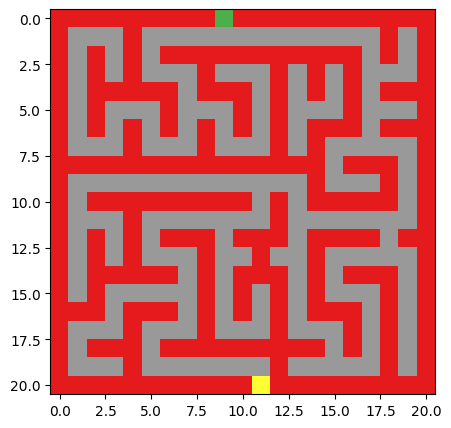

In [11]:
# Load original maze
new_wall = Maze(mazefile="maze.txt")

# place a new wall, 2 rows down and three columns to the right of the entrance
new_wall.contents[2][13] = wall_colour
new_wall.show_maze()

In [ ]:
# saving and reloading mazes 

# save edited maze to new file
new_wall.save_to_txt("maze-newwall.txt")

# reload into new maze object
print('this is the reloaded maze')
reloaded_maze = Maze(mazefile="maze-newwall.txt")

# test they have the same contents
assert reloaded_maze.contents == new_wall.contents
print("the reloaded maze matches the version still in memory")

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 4: Testing your understanding by creating new instances to break algorithms</h2>
    <h3><b>10 Marks</b> - 5 for each new maze</h3>
    Experiment with creating new mazes then combine and adapt the code snippets above to:
    <ol>
        <li> Create a maze in which depth-first search never finds the goal state but breadth-first does.
            <ul><li>save the new maze to file called <i>maze-breaks-depth.txt</i></li></ul>
        <li> Create a maze in which depth-first finds a path to the goal with the same length as the one found by breadth-first search, but using fewer trials.</li>
            <ul><li>save the new maze to file called <i>maze-depth-better.txt</i></li></ul>
        <li> On the marking server you will be asked to upload these two files.</li>
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b><br>
    <ul>
        <li>The code on the marking server does not have the method <code>show_maze()</code>. So you can use this method while you develop your mazes, but <b>you must comment this out before you submit.</b></li>
        <li>Because we can't guess your maze design, the first test will take a while to run.
            <ul>
                <li>you can speed it up by editing line 107 for maze.py to reduce the delay between maze refreshes</li>
                <li>then re-run the first code cell in the notebook to reimport maze.py</li>
            </ul>
        </li>
    </ul>
</div>

In [ ]:
%%writefile -a "studentcode/student_wb3.py"
wall_colour= 0.0
hole_colour = 1.0

def create_maze_breaks_depthfirst():
    # ====> insert your code below here
    #remember to comment out any mention of show_maze() before you submit your work
    maze = Maze(mazefile="maze.txt")

    maze.contents[3][4] = hole_colour  # Open path to trick DFS
    maze.contents[8][4] = wall_colour  # Block DFS at the end

    maze.contents[10][6] = hole_colour  # Another DFS trap
    maze.contents[14][6] = wall_colour  # Dead-end
    maze.contents[16][1] = hole_colour  # Dead-end
    maze.contents[19][4] = hole_colour  # Dead-end

    maze.contents[8][1] = hole_colour
    maze.contents[12][9] = wall_colour
    maze.contents[11][12] = wall_colour
    maze.contents[9][2] = wall_colour
    maze.contents[10][19] = wall_colour
    maze.contents[18][5]=wall_colour

    maze.save_to_txt("maze-breaks-depth.txt")

    
    # <==== insert your code above here

Appending to studentcode/student_wb3.py


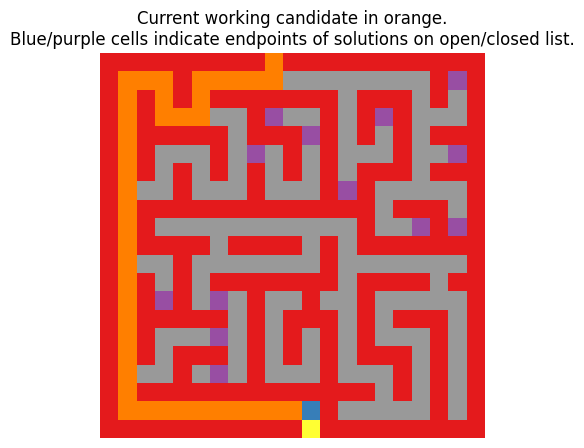

search using breadth-first algorithm successful after 816 attempts length of path is 41 moves.
 your maze defeates depth-first search breadth-first can solve your maze in 816 trialstest passed


In [ ]:
def test_maze_that_breaks_depthfirst():
    
    outstr= ""
    #depth first should not complete the maze
    depth_behaviour = run_on_maze(student_wb3.DepthFirstSearch, show_runlog=False,mazefile='maze-breaks-depth.txt') 
    assert depth_behaviour[1] == -1,' depth first should not finish on the maze'
    assert depth_behaviour[0] == -1,' depth first should be terminated after 1500 trials'
    outstr +=' your maze defeates depth-first search '
    
    #breadth first should
    breadth_behaviour = run_on_maze(student_wb3.BreadthFirstSearch, show_runlog=False,mazefile='maze-breaks-depth.txt') 
    assert breadth_behaviour[0] >0, ' breadth first should solve maze after enough trials'
    assert breadth_behaviour[1] >0, ' breadth first should solve maze with path >0 moves'
    outstr += f'breadth-first can solve your maze in {breadth_behaviour[0]} trials'
    outstr +='test passed'
    print(outstr)

#getting latest saved version of your code
reload(student_wb3)
student_wb3.create_maze_breaks_depthfirst()
test_maze_that_breaks_depthfirst()

In [ ]:
%%writefile -a "studentcode/student_wb3.py"

def create_maze_depth_better():
    # ====> insert your code below here
    #remember to comment out any mention of show_maze() before you submit your work
    maze = Maze(mazefile="maze.txt")
    maze.contents[1][8] = wall_colour
    maze.contents[9][10] = wall_colour
    maze.contents[15][6] = wall_colour
    maze.contents[13][2] = wall_colour
    maze.contents[12][13] = wall_colour
    maze.contents[2][13]=wall_colour
    maze.save_to_txt("maze-depth-better.txt")
    # <==== insert your code above here

Appending to studentcode/student_wb3.py


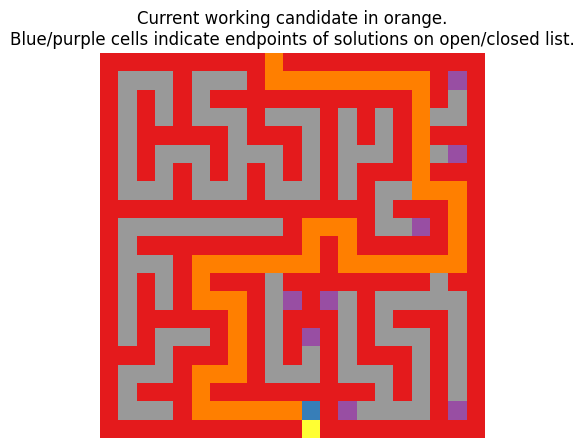

search using breadth-first algorithm successful after 456 attempts length of path is 57 moves.
both find goal state and depth-first path is as good or shorter
depth- first needs fewer attempts
test passed - you designed your maze well


In [ ]:
def test_maze_depth_better():
    depth_behaviour = run_on_maze(student_wb3.DepthFirstSearch, show_runlog=False,mazefile='maze-depth-better.txt')
    breadth_behaviour = run_on_maze(student_wb3.BreadthFirstSearch, show_runlog=False,mazefile='maze-depth-better.txt') 
    
    #should both find the goal state
    #but I can't know how long the path is on your maze
    assert depth_behaviour[1] != -1, 'error: depth first is not finding the goal state'
    assert breadth_behaviour[1] != -1, 'error: breadth first is not finding the goal state'
    assert depth_behaviour[1] <= breadth_behaviour[1], 'error: depth first should not find a longer path'
    print('both find goal state and depth-first path is as good or shorter')
    
    # depth first should use fewer trials
    assert depth_behaviour[0] != -1, 'error: depth first is not finding the goal state'
    assert breadth_behaviour[0]!= -1, 'error: breadth first is not finding the goal state'
    assert depth_behaviour[0] < breadth_behaviour[0], 'error: depth first should take fewer trials'
    print('depth- first needs fewer attempts')
    print('test passed - you designed your maze well')

#getting latest saved version of your code
reload(student_wb3)
student_wb3.create_maze_depth_better()
test_maze_depth_better()

<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook)</li>
    </ol>
</div>